In [14]:
import itertools

import astropy.units as u
import numpy as np
import astropy.time
import matplotlib.pyplot as plt
from astropy.visualization import quantity_support
import astropy.constants as const

import xrtpy
import aiapy.response

In [2]:
from xrtpy.response.effective_area import index_mapping_to_fw1_name, index_mapping_to_fw2_name

In [7]:
filters = [
    'Al-poly',
    'Be-thin',
    'Be-med',
    'Be-thick',
]
date = astropy.time.Time('2006-09-22T22:00:00')

## Temperature Response Functions

In [27]:
foo = xrtpy.response.TemperatureResponseFundamental('be-thin', date)

In [28]:
foo.effective_area() * foo.solid_angle_per_pixel * (const.c * const.h / foo.channel_wavelength).to('eV ph-1') / foo.ev_per_electron / foo.ccd_gain_right

<Quantity [3.97869957e-19, 1.03260460e-18, 2.46082912e-18, ...,
           1.55966159e-51, 0.00000000e+00, 0.00000000e+00] cm2 DN sr / (ph pix)>

In [12]:
foo.ev_per_electron

<Quantity 3.6500001 eV / electron>

In [13]:
foo.ccd_gain_right

<Quantity 59.09999847 electron / DN>

In [20]:
foo.channel_wavelength

<Quantity [  1.   ,   1.1  ,   1.2  , ..., 399.787, 399.893, 400.   ] Angstrom ph>

In [30]:
foo.channel_wavelength

<Quantity [  1.   ,   1.1  ,   1.2  , ..., 399.787, 399.893, 400.   ] Angstrom ph>

In [4]:
temp_response = {}
for f in filters:
    resp = xrtpy.response.TemperatureResponseFundamental(f, date)
    temp_response[resp.name] = (resp.CHIANTI_temperature, resp.temperature_response()) 

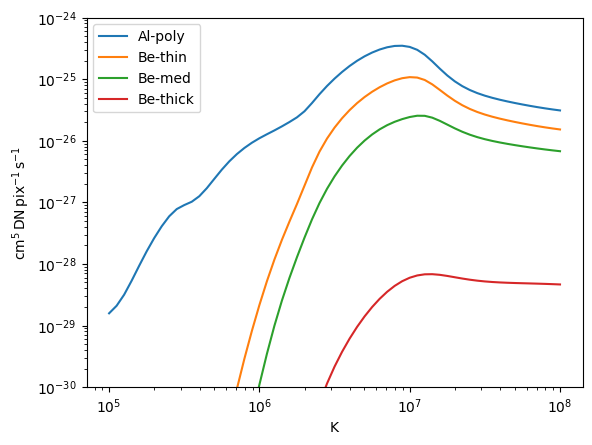

In [79]:
with quantity_support():
    for f in temp_response:
        plt.plot(*temp_response[f], label=f)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-30,1e-24)
plt.legend()

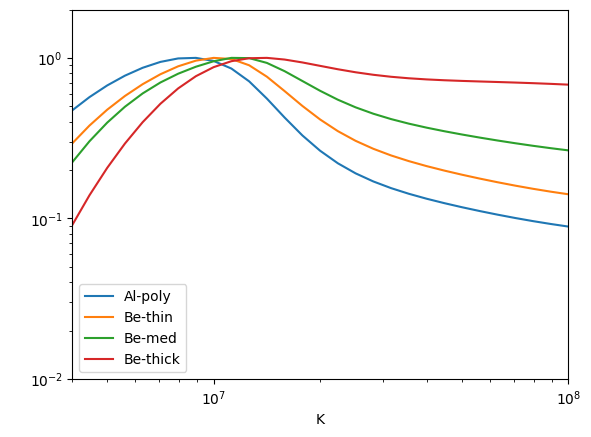

In [80]:
with quantity_support():
    for f in temp_response:
        T,tr = temp_response[f]
        plt.plot(T, tr/tr.max(), label=f)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-2,2)
plt.xlim(4e6,1e8)
plt.legend()

In [8]:
pairs = [sorted(p) for p in itertools.product(filters,filters,) if p[0] != p[1]]
pairs = set(['/'.join(p) for p in pairs])
pairs = [p.split('/') for p in pairs]

In [109]:
pairs

[['Al-poly', 'Be-thick'],
 ['Be-med', 'Be-thin'],
 ['Be-thick', 'Be-thin'],
 ['Be-med', 'Be-thick'],
 ['Al-poly', 'Be-med'],
 ['Al-poly', 'Be-thin']]

In [110]:
pairs = [
    ['Al-poly', 'Be-thick'],
    ['Be-thin', 'Be-med'],
    ['Be-thin', 'Be-thick'],
    ['Be-med', 'Be-thick'],
    ['Al-poly', 'Be-med'],
    ['Al-poly', 'Be-thin'] 
]

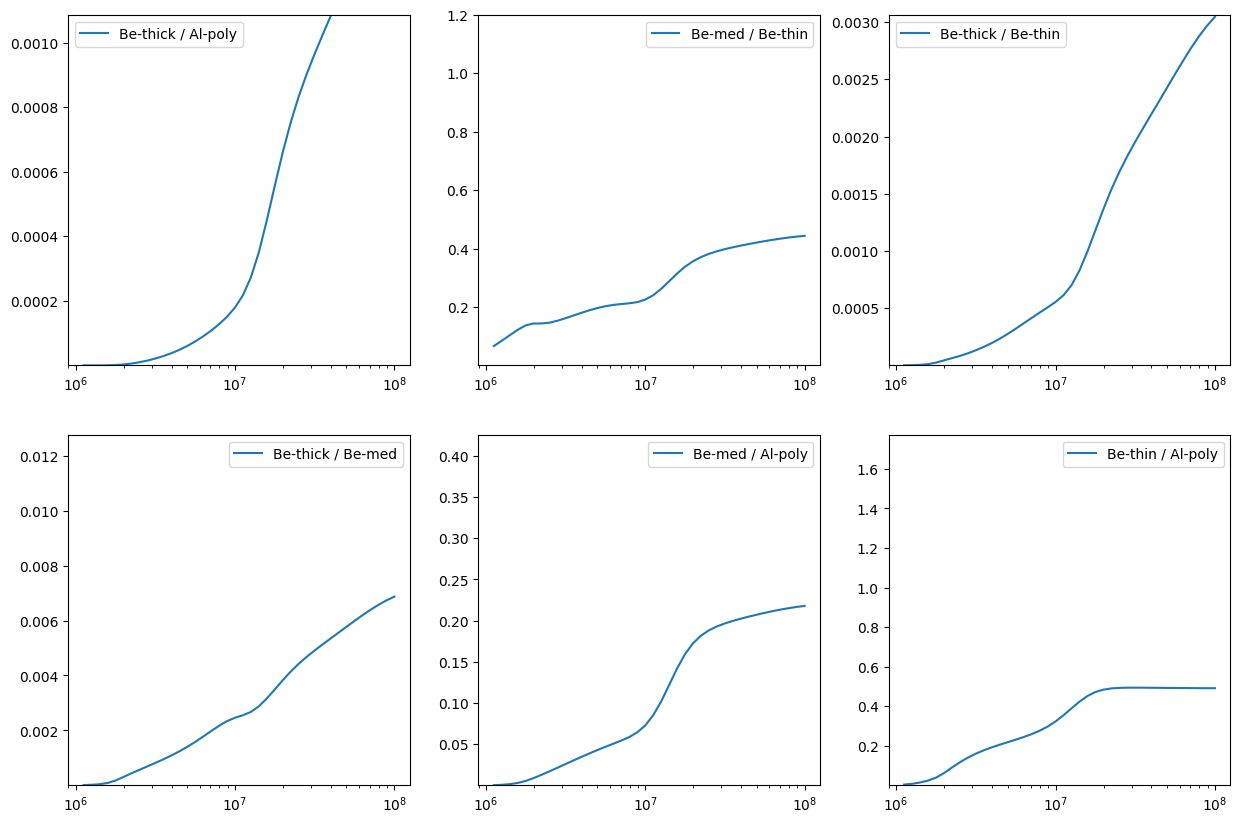

In [111]:
fig = plt.figure(figsize=(15,10))
for i,(pa,pb) in enumerate(pairs):
    Ta,tra = temp_response[pa]
    Tb,trb = temp_response[pb]
    i_T = np.where(Ta > 1e6*u.K)
    ratio = trb.to_value('cm5 DN pix-1 s-1')/tra.to_value('cm5 DN pix-1 s-1')
    ratio = ratio[i_T]
    #ratio_grad = np.gradient(ratio, np.gradient(log_T))
    ax = fig.add_subplot(2,3,i+1)
    ax.plot(Ta[i_T], ratio, label=f'{pb} / {pa}')
    ax.set_xscale('log')
    ax.set_ylim(ratio[(ratio.shape[0] + 1)//2]*np.array([0.01,5]))
    ax.legend()
#plt.xlim(1e6,1e8)
#plt.ylim(1e-10,1e10)
#plt.legend(ncol=2)
#plt.axhline(y=1,color='k',ls=':',)

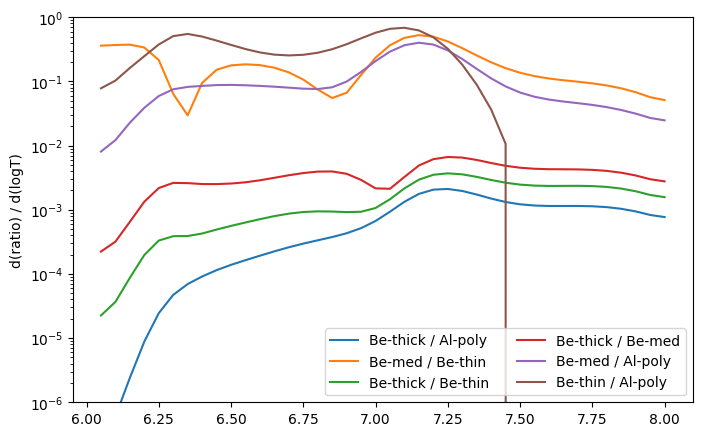

In [121]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
for pa,pb in pairs[:]:
    Ta,tra = temp_response[pa]
    Tb,trb = temp_response[pb]
    i_T = np.where(Ta > 1e6*u.K)
    ratio = trb.to_value('cm5 DN pix-1 s-1')/tra.to_value('cm5 DN pix-1 s-1')
    Ta = Ta[i_T]
    ratio = ratio[i_T]
    log_T = np.log10(Ta.to_value())
    ratio_grad = np.gradient(ratio, log_T) 
    ax.plot(log_T, ratio_grad, label=f'{pb} / {pa}')
#ax.set_xscale('log')
#ax.set_yscale('symlog',linthresh=1e-10)
ax.set_yscale('log')
ax.set_ylim(1e-6,1)
ax.set_ylabel('d(ratio) / d(logT)')
ax.legend(ncol=2)
plt.axhline(y=0,color='k',ls=':',)

## Sandbox

In [25]:
import sunpy.map

In [26]:
m_xrt_official = sunpy.map.Map('http://solar.physics.montana.edu/HINODE/XRT/SCIA/synop_official/2009/04/04/H1800/comp_XRT20090404_180307.6.fits')

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

comp_XRT20090404_180307.6.fits:   0%|          | 0.00/4.22M [00:00<?, ?B/s]

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: hglt_obs,dsun_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,dsun_obs,crlt_obs
For frame 'heliographic_stonyhurst' the following metadata is missing: solar_b0,dsun_obs
 [sunpy.map.mapbase]


Observatory,Hinode
Instrument,XRT
Detector,XRT
Measurement,Al poly-Open
Wavelength,Unknown
Observation Date,2009-04-04 18:03:07
Exposure Time,5.79712 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.04172 2.04172] arcsec / pix
Reference Pixel,[511.5 511.5] pix

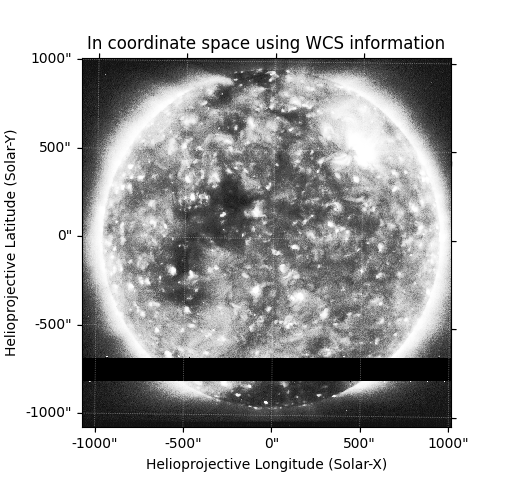
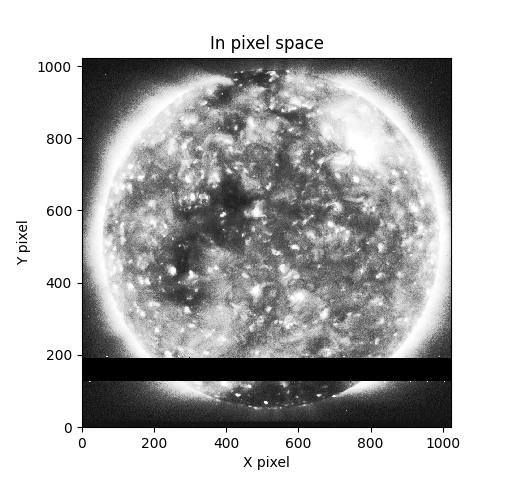
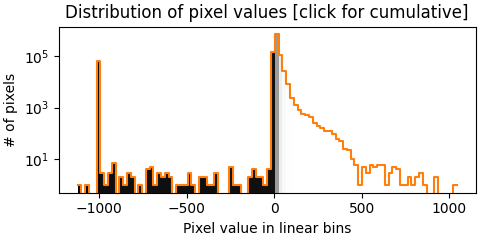
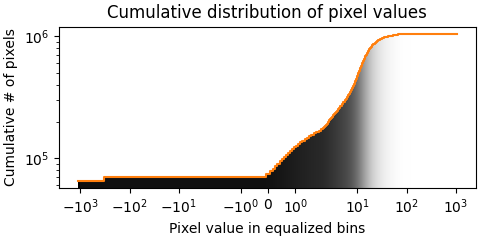

In [27]:
m_xrt_official

In [28]:
m_xrt_not_official = sunpy.map.Map('http://solar.physics.montana.edu/HINODE/XRT/SCIA/synop_images/syncmp_FITS/2009/04/comp_XRT20090404_180307.6.fits')

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: hglt_obs,dsun_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,dsun_obs,crlt_obs
For frame 'heliographic_stonyhurst' the following metadata is missing: solar_b0,dsun_obs
 [sunpy.map.mapbase]


Observatory,Hinode
Instrument,XRT
Detector,XRT
Measurement,Al poly-Open
Wavelength,Unknown
Observation Date,2009-04-04 18:03:07
Exposure Time,5.79712 s
Dimension,[1024. 1024.] pix
Coordinate System,helioprojective
Scale,[2.04172 2.04172] arcsec / pix
Reference Pixel,[511.5 511.5] pix

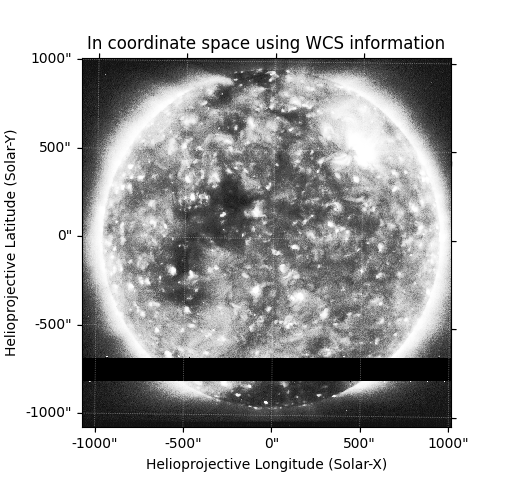
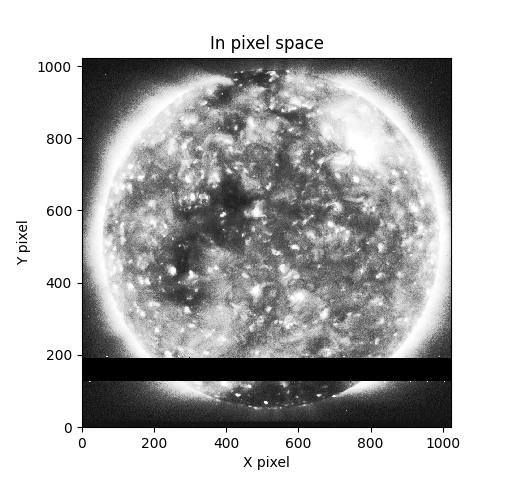
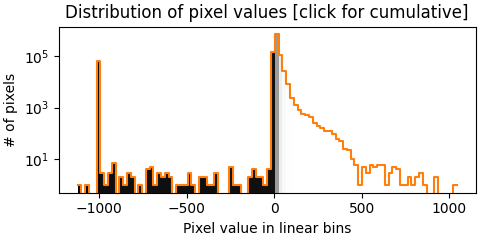
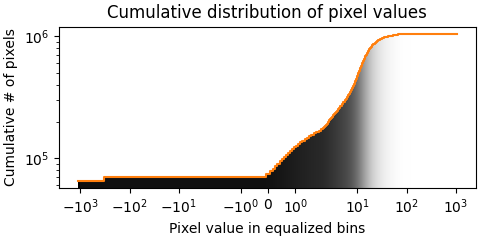

In [29]:
m_xrt_not_official

In [30]:
import matplotlib.pyplot as plt

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


For frame 'heliographic_stonyhurst' the following metadata is missing: hglt_obs,dsun_obs,hgln_obs
For frame 'heliographic_carrington' the following metadata is missing: crln_obs,dsun_obs,crlt_obs
For frame 'heliographic_stonyhurst' the following metadata is missing: solar_b0,dsun_obs
 [sunpy.map.mapbase]


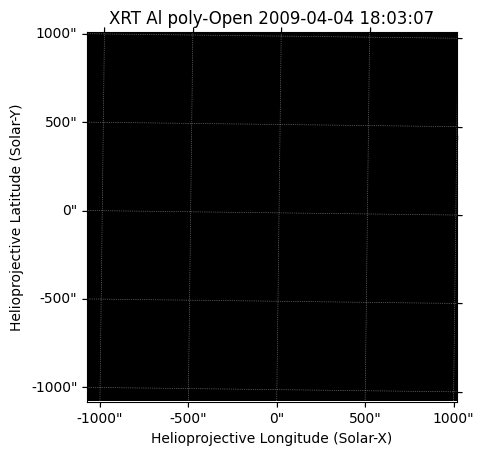

In [32]:
(m_xrt_official - m_xrt_not_official.data).plot()

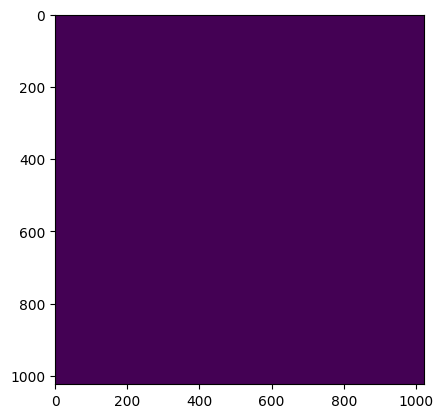

In [34]:
plt.imshow(
    m_xrt_official.data - m_xrt_not_official.data,
)

In [35]:
m_xrt_official.data - m_xrt_not_official.data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
m_xrt_official.meta

MetaDict([('simple', True),
          ('bitpix', -32),
          ('naxis', 2),
          ('naxis1', 1024),
          ('naxis2', 1024),
          ('date', '2009-04-09T01:33:19.000'),
          ('date_rf0', '2009-04-09T01:33:19.000'),
          ('date_rf1', '2014-03-02T05:51:35.916'),
          ('satellit', 33),
          ('telescop', 'HINODE'),
          ('instrume', 'XRT'),
          ('timesys', 'UTC (TBR)'),
          ('mdp_clk', 2309294601.0),
          ('fileorig', '2009_0409_013242.sci'),
          ('p1row', 0),
          ('p2row', 2047),
          ('p1col', 0),
          ('p2col', 2047),
          ('tr_mode', 'FIX'),
          ('img_mode', 1),
          ('aec_flg', 'off'),
          ('aec_tnum', 0),
          ('aec_rslt', 3),
          ('origin', 'JAXA/ISAS, SIRIUS'),
          ('data_lev', 2),
          ('orig_rf0', 'JAXA/ISAS, SIRIUS'),
          ('ver_rf0', '1.47b'),
          ('orig_rf1', ''),
          ('ver_rf1', 'v2014-Jan-15'),
          ('prog_ver', 5712),
          ('seq

In [57]:
import itertools

In [77]:
fw_combos = itertools.product(list(index_mapping_to_fw1_name.keys()), list(index_mapping_to_fw2_name.keys()))
[(fw, f'Filter wheel 1: {fw[0]}, Filter wheel 2: {fw[1]}') for fw in fw_combos]

[(('Open', 'Open'), 'Filter wheel 1: Open, Filter wheel 2: Open'),
 (('Open', 'Al-mesh'), 'Filter wheel 1: Open, Filter wheel 2: Al-mesh'),
 (('Open', 'Ti-poly'), 'Filter wheel 1: Open, Filter wheel 2: Ti-poly'),
 (('Open', 'G-band'), 'Filter wheel 1: Open, Filter wheel 2: G-band'),
 (('Open', 'Al-thick'), 'Filter wheel 1: Open, Filter wheel 2: Al-thick'),
 (('Open', 'Be-thick'), 'Filter wheel 1: Open, Filter wheel 2: Be-thick'),
 (('Al-poly', 'Open'), 'Filter wheel 1: Al-poly, Filter wheel 2: Open'),
 (('Al-poly', 'Al-mesh'), 'Filter wheel 1: Al-poly, Filter wheel 2: Al-mesh'),
 (('Al-poly', 'Ti-poly'), 'Filter wheel 1: Al-poly, Filter wheel 2: Ti-poly'),
 (('Al-poly', 'G-band'), 'Filter wheel 1: Al-poly, Filter wheel 2: G-band'),
 (('Al-poly', 'Al-thick'),
  'Filter wheel 1: Al-poly, Filter wheel 2: Al-thick'),
 (('Al-poly', 'Be-thick'),
  'Filter wheel 1: Al-poly, Filter wheel 2: Be-thick'),
 (('C-poly', 'Open'), 'Filter wheel 1: C-poly, Filter wheel 2: Open'),
 (('C-poly', 'Al-mesh

In [66]:
from sunpy.net.scraper import Scraper
from sunpy.time import TimeRange

In [ ]:
http://solar.physics.montana.edu/HINODE/XRT/SCIA/synop_images/syncmp_PNG/2020/11/SYN_XRT20201109_181808.1.1024.01.png

In [69]:
png_scraper = Scraper('http://solar.physics.montana.edu/HINODE/XRT/SCIA/synop_images/syncmp_PNG/%Y/%m/SYN_XRT%Y%m%d_%H%M%S.(\d){1}.1024.(\d){2}.png',
        regex=True)

In [70]:
trange = TimeRange(astropy.time.Time('2020-11-09 18:00:00'),b=1*u.h)

In [71]:
png_scraper.filelist(trange)

['http://solar.physics.montana.edu/HINODE/XRT/SCIA/synop_images/syncmp_PNG/2020/11/SYN_XRT20201109_181808.1.1024.01.png',
 'http://solar.physics.montana.edu/HINODE/XRT/SCIA/synop_images/syncmp_PNG/2020/11/SYN_XRT20201109_181829.1.1024.10.png',
 'http://solar.physics.montana.edu/HINODE/XRT/SCIA/synop_images/syncmp_PNG/2020/11/SYN_XRT20201109_181902.6.1024.30.png']

In [75]:
Scraper('http://solar.physics.montana.edu/HINODE/XRT/SCIA/synop_images/syncmp_PNG/2020/11/SYN_XRT20201109_181808.(\d){1}.1024.(\d){2}.png',
        regex=True).filelist(sunpy.time.TimeRange(astropy.time.Time.now(), 1*u.s))

/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),
/Users/wtbarnes/mambaforge/envs/mocksipipeline/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "d2dtf" yielded 1 of "dubious year (Note 5)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


[]

This block is for testing the client

{'Open': 0, 'Al-poly': 1, 'C-poly': 2, 'Be-thin': 3, 'Be-med': 4, 'Al-med': 5}

In [1]:
from sunpy.net import Fido, attrs
import astropy.units as u
import astropy.time

from mocksipipeline.net import XRTSynopticClient

date = astropy.time.Time('2020-11-09 18:00:00') 
q = Fido.search(
    attrs.Time(date, date+1*u.h),
    attrs.Instrument.xrt,
    attrs.Source.hinode,
    attrs.Provider('MSU'),
    attrs.Physobs.intensity,
    attrs.Level(2)
)

ModuleNotFoundError: No module named 'mocksipipeline'

In [ ]:
from sunpy.net import Fido, attrs
import astropy.units as u
import astropy.time

import mocksipipeline.net
from mocksipipeline.net import FilterWheel1, FilterWheel2

date_start = astropy.time.Time('2020-11-09 05:00:00')
date_end = date_start + 1*u.h
q = Fido.search(
    attrs.Time(date_start, date_end),
    attrs.Instrument.xrt,
    attrs.Source.hinode,
    attrs.Provider('MSU'),
    attrs.Physobs.intensity,
    attrs.Level(2),
    #FilterWheel1('open'),
    #FilterWheel2('al-mesh'),
)